In [1]:
import random
from typing import Tuple
import copy
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
class Board:
    #Tt lớp
    win_number = 5      #số lượng quân liên tiếp nhau tối thiểu cần để thắng
    #Thuộc tính đối tượng
    def __init__(self, size):
        self.size = size
        self.board = []
        self.selectedPos = []
        self.considerRange = []
        self.iniBoard()

    def iniBoard(self):
        for x in range(self.size):
            for y in range(self.size):
                self.board.append(0)

    def printBoard(self):
      size = self.size
      board_2d = np.array(self.board).reshape((size, size))

      # Check if a figure with the title "Gomoku Board" already exists
      fig_exists = False
      for num in plt.get_fignums():
          fig = plt.figure(num)
          if fig.canvas.get_window_title() == "Gomoku Board":
              fig_exists = True
              break

      if not fig_exists:
          # Create a new figure and axes if one doesn't exist
          fig, ax = plt.subplots(figsize=(8, 8)) # Kích thước figure tỉ lệ 1:1
          fig.canvas.manager.set_window_title("Gomoku Board") # Set the window title for identification
      else:
          # Get the existing figure and clear the axes
          fig = plt.figure(num)
          ax = fig.gca()
          ax.clear()

      plt.ion()  # Bật chế độ interactive mode


      # Đặt vị trí các tick ở giữa các ô cho cả trục x và y
      ax.set_xticks(np.arange(size) + 0.5)
      ax.set_yticks(np.arange(size) + 0.5)

      # Tạo danh sách nhãn từ 0 đến size-1
      labels = [str(i) for i in range(size)]

      # Đặt nhãn cho các tick
      # Horizontal alignment 'center' is the default for xticklabels
      ax.set_xticklabels(labels)
      ax.set_yticklabels(labels, va='center') # Use vertical alignment for y-labels

      # Draw grid lines at the boundaries of the squares (0 to size)
      for i in range(size + 1):
          ax.axvline(i, color='black', lw=1)
          ax.axhline(i, color='black', lw=1)

      # Hiển thị quân cờ (vẫn giữ ở giữa ô)
      for i in range(size):
          for j in range(size):
              value = board_2d[i, j]
              if value == 1:
                  ax.text(j + 0.5, i + 0.5, 'X', ha='center', va='center', fontsize=20, color='blue')
              elif value == 2:
                  ax.text(j + 0.5, i + 0.5, 'O', ha='center', va='center', fontsize=20, color='red')

      # Đặt giới hạn trục để bảng hiển thị đúng
      ax.set_xlim(0, size)
      ax.set_ylim(0, size)
      ax.invert_yaxis() # Thêm dòng này để trục y tăng từ trên xuống dưới

      ax.set_aspect('equal', adjustable='box')
      ax.set_title("Gomoku Board")
      ax.set_xlabel("Column") # Keep xlabel for clarity
      ax.set_ylabel("Row")

      plt.show()
      plt.pause(0.1) # Tạm dừng ngắn để cập nhật biểu đồ

    def turnValue(self, value):
        if (value == 0):
            return "   "
        elif (value == 1):
            return " X "
        elif (value == 2):
            return " O "

    def move(self, pos, value) -> bool:
        i = self.size*pos[0] + pos[1]
        if(self.board[i] != 0):
            return False
        if(i > 399 or i < 0):
            print("Tọa độ ô không hợp lệ. Vui lòng chọn lại.\n")
            return False
        else:
            self.board[i] = value
            return True

    def getSize(self):
        return self.size

    def isEnd(self) -> bool:
        size = self.size
        is_win_row = False
        is_win_col = False
        is_win_right = False
        is_win_left = False

        for i in range(size*size):
            if(self.board[i] == 0):
                is_win_row = False
                is_win_col = False
                is_win_right = False
                is_win_left = False
                continue

            #Check hàng ngang
            for j in range(1, self.win_number):
                if(size - i%size > 4):
                    if(self.board[i+j] == self.board[i]):
                        is_win_row = True
                    else:
                        is_win_row = False
                        break

            #Check hàng dọc
            for j in range(1, self.win_number):
                if(size - int(i/size) > 4):
                    if(self.board[i+size*j] == self.board[i]):
                        is_win_col = True
                    else:
                        is_win_col = False
                        break

            #Check hàng chéo bên phải
            for j in range(1, self.win_number):
                if(size - i%size > 4 and size - int(i/size) > 4):
                    if(self.board[i+(size+1)*j] == self.board[i]):
                        is_win_right = True
                    else:
                        is_win_right = False
                        break

            #Check hàng chéo bên trái
            for j in range(1, self.win_number):
                if(i%size > 3 and size - int(i/size) > 4):
                    if(self.board[i+(size-1)*j] == self.board[i]):
                        is_win_left = True
                    else:
                        is_win_left = False
                        break

            if(is_win_row):
                return True
            if(is_win_col):
                return True
            if(is_win_right):
                return True
            if(is_win_left):
                return True
        return False

    def addToConsiderRange(self, a):
        if(a not in self.considerRange):
            self.considerRange.append(a)

    def remFromConsiderRange(self, a):
        if(a in self.considerRange):
            self.considerRange.remove(a)

    def getConsiderRange(self):
        return self.considerRange

    def getBoardArr(self):
        return np.array(self.board)

    def isClickable(self, pos):
        i = self.size*pos[0] + pos[1]
        if i in self.selectedPos:
            return False
        return True

In [3]:
class ConsiderRange:

    def __init__(self, board):
        self.board = board
        self.size = board.getSize()

    #Chuyển đổi nếu vị trí lớn/nhỏ hơn biên
    def convert(self, a):
        if(a<0):
            a = 0
        elif(a>self.size):
            a = self.size
        return a

    #Máy mở rộng khu vực cần xem xét
    def expandConsiderRange(self, pos):
        board = self.board
        x = pos[0]
        y = pos[1]
        startX = self.convert(x-2)
        endX = self.convert(x+3)
        startY = self.convert(y-2)
        endY = self.convert(y+3)
        for i in range(startX, endX):
            for j in range(startY, endY):
                pos = (i, j)
                if(board.isClickable(pos)):
                    self.board.addToConsiderRange(pos)

    def remFromConsiderRange(self, pos):
        self.board.remFromConsiderRange(pos)

In [4]:
class Player:

    def __init__(self):
        self.value = ''

    def move(self) -> Tuple[int, int]:
        print("Chọn ô cờ: ")
        x = int(input("Chọn hàng ngang: "))
        y = int(input("Chọn cột dọc: "))
        return (x, y)

    def getValue(self) -> str:
        return self.value

    def setValue(self, char: str):
        self.value = char

In [5]:
class OpeningBook:
    actions = [
        (6, 13, 14), (6, 3, 2), (6, 2, 7), (6, 0, 11), (6, 11, 17), (6, 16, 8), (6, 5, 10), (6, 17, 22),
        (13, 4, 8), (13, 6, 18), (13, 17, 16), (13, 9, 8), (13, 8, 4),
        (16, 5, 10), (16, 7, 5),
        (17, 18, 6), (17, 13, 11), (17, 23, 24),
        (18, 11, 10)
    ]
    def __init__(self):
        self.posArray2 = []
        self.posArray3 = []
        self.posArray4 = []
        self.initialPosArray()

    def initialPosArray(self):
        for action in self.actions:
            self.splitAction(action[0], action[1], action[2])

    def splitAction(self, a, b, c):
        x = self.encode(a, b)
        if a not in self.posArray2:
            self.posArray2.append(a)
        if (a, b) not in self.posArray3:
            self.posArray3.append((a, b))
        if (x, c) not in self.posArray4:
            self.posArray4.append((x, c))

    def encode(self, a, b) -> int:
        result = (a * b) + (a - b)
        return result

    #hàm để trả về số b ngẫu nhiên cho một số a cho trước
    def getRandomPos(self, a, posArray) -> int:
        filteredArray = [pair for pair in posArray if pair[0] == a]
        if filteredArray:
            randomPair = random.choice(filteredArray)
            return randomPair[1]
        else:
            return -1

    def getFromPos2(self) -> int:
        return random.choice(self.posArray2)

    def getFromPos3(self, a) -> int:
        return self.getRandomPos(a, self.posArray3)

    def getFromPos4(self, a, b) -> int:
        x = self.encode(a, b)
        return self.getRandomPos(x, self.posArray4)

    def addAction(self, a, b, c):
        if (a, b, c) not in self.actions:
            self.actions.append((a, b, c))
            self.splitAction(a, b, c)

In [6]:
class BoardEval:
    # Định nghĩa các mẫu trạng thái
    patterns1 = {
        'FiveInRow': ['11111'],  # trạng thái đã thắng
        'LiveFour': ['011110'],  # chắc chắn thắng
        'DeadFour': ['11101', '211110', '011112', '11011'],  # có thể nếu kết hợp với các case khác
        'DeadThree': ['21110', '211010', '210110', '0101010', '2011102'],
        'LiveThree': ['01110', '011010'],
        'DeadTwo': ['21010', '210010', '010012', '01012', '0112', '2110'],
        'LiveTwo': ['01010', '010010', '0110']
    }

    patterns2 = {
        'FiveInRow': ['22222'],  # trạng thái đã thắng
        'LiveFour': ['022220'],  # chắc chắn thắng
        'DeadFour': ['22202', '122220', '022221','22022'],  # có thể nếu kết hợp với các case khác
        'DeadThree': ['12220', '122020', '120220', '0202020', '1022201'],
        'LiveThree': ['02220', '022020'],
        'DeadTwo': ['12020', '120020', '020021', '02021', '0221', '1220'],
        'LiveTwo': ['02020', '020020', '0220']
    }

    scores = {
        'FiveInRow': 100000,
        'LiveFour': 15000,
        'DeadFour': 10000,
        'DeadThree': 500,
        'LiveThree': 6000,
        'DeadTwo': 300,
        'LiveTwo': 50
    }

    def __init__(self, match):
        self.board = match.getBoard()
        self.whoseTurn = match.getTurn() % 2 + 1
        self.atkW = match.getWeight()[0]
        self.defW = match.getWeight()[1]

    def boardToString(self, board, size):
        board = board.reshape(size, size)
        row = [''.join(map(str, row)) for row in board]
        col = [''.join(map(str, col)) for col in zip(*board)]
        diag1 = [''.join(map(str, [board[x][y] for x in range(size) for y in range(size) if x - y == d])) for d in range(-size + 1, size)]
        diag2 = [''.join(map(str, [board[x][y] for x in range(size) for y in range(size) if x + y == d])) for d in range(2 * size - 1)]
        return row + col + diag1 + diag2

    def countPattern(self, patterns, array):
        counts = {key: 0 for key in self.scores.keys()}  # Thay đổi từ 'key()' thành 'keys()'
        for row in array:
            for key, patterns_list in patterns.items():
                for pattern in patterns_list:
                    counts[key] += row.count(pattern)
                            #row = row.replace(pattern, '*' * len(pattern), 1)
        return counts

    def boardEval(self, counts):
        boardEval = 0
        if counts['FiveInRow'] != 0:
            boardEval += self.scores['FiveInRow']
        if counts['LiveFour'] != 0:
            boardEval += self.scores['LiveFour']
        if counts['DeadFour'] != 0:
            boardEval += self.scores['DeadFour']
        if counts['DeadThree'] != 0:
            boardEval += self.scores['DeadThree']
        if counts['LiveThree'] != 0:
            boardEval += self.scores['LiveThree']
        if counts['DeadTwo'] != 0:
            boardEval += self.scores['DeadTwo']
        if counts['LiveTwo'] != 0:
            boardEval += self.scores['LiveTwo']
        return boardEval

    def getPoint(self):
        size = self.board.getSize()
        string = self.boardToString(self.board.getBoardArr(), size)

        if self.whoseTurn == 1:
            counts1 = self.countPattern(self.patterns1, string)
            counts2 = self.countPattern(self.patterns2, string)
        elif self.whoseTurn == 2:
            counts2 = self.countPattern(self.patterns1, string)
            counts1 = self.countPattern(self.patterns2, string)

        atkPoint = self.boardEval(counts1)
        defPoint = self.boardEval(counts2)

        return atkPoint * self.atkW - defPoint * self.defW

In [7]:
class MoveValue:
    def __init__(self, move, value):
        self.move = move
        self.value = value

class AlphaBeta:
    def __init__(self):
        self.depth = 3
        self.index = 0

    def alphaBeta(self, state) -> Tuple[int, int]:
        best_move = None
        mv = self.maxValue(state, -math.inf, math.inf, 1)
        best_move = mv.move
        print(self.index)
        print("AI move: "+str(best_move))
        return best_move

    def maxValue(self, state, a, b, depth) -> MoveValue:
        if self.terminalTest(state, depth):
            return MoveValue(None, self.utility(state))
        v = -math.inf
        best_move = None
        for move, s in self.successors(state):
            self.index += 1
            mv = self.minValue(s, a, b, depth + 1)
            if mv.value > v:
                v = mv.value
                best_move = move
            if v >= b:
                return MoveValue(move, v)
            a = max(a, v)
        return MoveValue(best_move, v)

    def minValue(self, state, a, b, depth) -> MoveValue:
        if self.terminalTest(state, depth):
            return MoveValue(None, self.utility(state))
        v = math.inf
        best_move = None
        for move, s in self.successors(state):
            self.index += 1
            mv = self.maxValue(s, a, b, depth + 1)
            if mv.value < v:
                v = mv.value
                best_move = move
            if v <= a:
                return MoveValue(move, v)
            b = min(b, v)
        return MoveValue(best_move, v)

    #điều kiện dừng
    def terminalTest(self, state, depth) -> bool:
        if(depth > self.depth):
            return True
        return state.getBoard().isEnd()

    #đánh giá trạng thái bàn cờ
    def utility(self, state):
        boardEval = BoardEval(state)
        return boardEval.getPoint()

    #chuyển sang trạng thái kế tiếp
    def successors(self, state):
        result = []
        considerRange = state.getBoard().getConsiderRange()
        considerRange = self.sortConsiderRange(state.getBoard(), considerRange)
        for move in considerRange:
            newState = copy.deepcopy(state)
            player = newState.checkWhoseTurn(newState.getTurn())
            newState.moveNotHaveLoop(player, move)
            result.append((move, newState))
        return result

    def get_surrounding_lines(self, board, a, radius=4):

        board = board.board
        board = np.array(board).reshape(20, 20)

        size = board.shape[0]
        row, col = a

        top = max(row - radius, 0)
        bottom = min(row + radius + 1, size)
        left = max(col - radius, 0)
        right = min(col + radius + 1, size)

        horizontal_line = board[row, left:right]
        vertical_line = board[top:bottom, col]
        top_left_to_bottom_right = []
        top_right_to_bottom_left = []

        for i in range(-radius, radius + 1):
            if 0 <= row + i < size and 0 <= col + i < size:
                top_left_to_bottom_right.append(board[row + i, col + i])
            if 0 <= row + i < size and 0 <= col - i < size:
                top_right_to_bottom_left.append(board[row + i, col - i])

        return [
            horizontal_line,
            vertical_line,
            np.array(top_left_to_bottom_right),
            np.array(top_right_to_bottom_left)
        ]

    def countFive(self, mang, a, b, size):
        arr = []
        arr.append(0)
        countFive = 0
        maxFive = 0
        while(len(arr) != 0):
            i = arr.pop()
            for j in range(5):
                if mang[i+j] == a:
                    countFive += 1
                elif mang[i+j] == b:
                    if(i+j+1 <= size-5):
                        arr.append(i+j+1)
                    countFive = 0
                    break
                else:
                    if(i+j+1 <= size-5):
                        arr.append(i+j+1)
            if countFive > maxFive:
                maxFive = countFive
            countFive = 0
        return maxFive

    def kiem_tra_mang(self, mang):
        maxFive = 0
        size = len(mang)
        if(size < 5):
            return maxFive

        maxFive = self.countFive(mang, 1, 2, size)
        maxFive = max(self.countFive(mang, 2, 1, size), maxFive)
        return maxFive

    def sortConsiderRange(self, board, considerRange):
        results = []
        for pos in considerRange:
            lines = self.get_surrounding_lines(board, pos)
            count = 0
            maxFive = 0
            for line in lines:
                countFive = self.kiem_tra_mang(line)
                if(countFive > 0):
                    count += 1
                maxFive = max(maxFive, countFive)
            results.append((pos, maxFive, count))
        results.sort(key=lambda x: (x[1], x[2]), reverse=True)
        sorted_pos = [x[0] for x in results]
        sorted_pos = sorted_pos[:15]
        return sorted_pos


In [8]:
class AIBrain:
    def __init__(self, match):
        self.match = match

    def move(self) -> Tuple[int, int]:
        turn = self.match.getTurn()
        board = self.match.getBoard()
        selectedPos = self.match.getSelectedPos()

        if(turn == 1):
            center_x = 20 // 2  # Tính toán tọa độ trung tâm theo chiều ngang
            center_y = 20 // 2  # Tính toán tọa độ trung tâm theo chiều dọc
            offset = 2  # Khoảng cách từ trung tâm đến ô xung quanh

            # Tạo tọa độ ngẫu nhiên trong 4 ô trung tâm
            x = random.randint(center_x - offset, center_x + offset)
            y = random.randint(center_y - offset, center_y + offset)
            return (x, y)
        if(turn > 1 and turn <= 4):
            move = self.openingBook()
            if(move == -1):
                move = self.alphaBeta()
            else:
                move = self.turnToNormalPos(selectedPos[0], move)
            return move
        else:
            move = self.alphaBeta()
            return move

    def openingBook(self) -> int:
        size = self.match.getBoard().getSize()
        turn = self.match.getTurn()
        selectedPos = self.match.getSelectedPos()

        openBk = OpeningBook()
        if (turn == 2):
            return openBk.getFromPos2()
        if(turn == 3):
            a = self.turnToSmallPos(selectedPos[0], selectedPos[1])
            return openBk.getFromPos3(a)
        if(turn == 4):
            a = self.turnToSmallPos(selectedPos[0], selectedPos[1])
            b = self.turnToSmallPos(selectedPos[0], selectedPos[2])
            return openBk.getFromPos4(a, b)

    def turnToSmallPos(self, pos0, pos1) -> int:
        x = pos0 // 20
        y = pos0 % 20
        X = 2 + (pos1 // 20 - x)
        Y = 2 + (pos1 % 20 - y)
        return X*5+Y

    def turnToNormalPos(self, pos0, pos1) -> Tuple[int, int]:
        x = pos1 // 5
        y = pos1 % 5
        X = pos0 // 20 + (x - 2)
        Y = pos0 % 20 + (y - 2)
        return (X, Y)

    def alphaBeta(self) -> Tuple[int, int]:
        ab = AlphaBeta()
        matchCopy = copy.deepcopy(self.match)
        return ab.alphaBeta(matchCopy)


In [9]:
class AI(Player):

    def __init__(self, match):
        super().__init__()
        self.match = match
        self.brain = None

    def move(self) -> Tuple[int, int]:
        turn = self.match.getTurn()
        matchCopy = copy.deepcopy(self.match)      #tạo bản sao của đối tượng
        self.brain = AIBrain(matchCopy)
        pos = self.brain.move()
        return pos

    def expandConsiderRange(self, pos):
        board = self.match.getBoard()
        considerRange = ConsiderRange(board)
        considerRange.expandConsiderRange(pos)
        considerRange.remFromConsiderRange(pos)

In [10]:
class Match:

    def __init__(self):
        self.board = Board(20)
        self.ai = AI(self)
        self.player = Player()
        self.turn = 0
        self.mode = 2

    def start(self):
        ai = self.ai
        player = self.player
        opt = 0

        #while(1):
        #    print("Chọn chế độ: ")
        #    print("1. Tấn công")
        #    print("2. Phòng thủ")
        #    print("3. Tấn công và Phòng thủ")
        #    self.mode = int(input("Nhập lựa chọn của bạn: "))
        #    if self.mode in [1, 2, 3]:
        #        break
        #    else:
        #        print("Lựa chọn không hợp lệ. Vui lòng chọn lại.\n")
        #print("\n")
        #chọn người đánh trước
        while(1):
            print("Chọn lượt chơi: ")
            print("1. Máy đánh trước")
            print("2. Người chơi đánh trước")
            print("3. Ngẫu nhiên")
            opt = int(input("Nhập lựa chọn của bạn: "))
            if opt in [1, 2, 3]:
                break
            else:
                print("Lựa chọn không hợp lệ. Vui lòng chọn lại.\n")

        #bắt đầu lượt đầu tiên
        self.turn = 1
        print("Lượt thứ: " + str(self.turn))
        if(opt == 3):
            opt = random.choice([1, 2])
        if(opt == 1):
            ai.setValue(1)
            player.setValue(2)
            self.move(ai)
            self.board.printBoard()
        elif (opt == 2):
            self.board.printBoard()
            ai.setValue(2)
            player.setValue(1)
            self.move(player)

        while(True):
            print("Lượt thứ: " + str(self.turn))
            player = self.checkWhoseTurn(self.turn)
            self.move(player)
            self.board.printBoard()
            if(self.board.isEnd() == True):
                if(opt == 1):
                    if(player.value == 1):
                        print("Máy thắng");
                    else:
                        print("Người chơi thắng");
                elif (opt == 2):
                    if(player.value == 2):
                        print("Máy thắng");
                    else:
                        print("Người chơi thắng");
                break

    def checkWhoseTurn(self, turn) -> Player:
        if(turn % 2 == 1):
            if(self.player.getValue() == 1):
                return self.player
            else:
                return self.ai
        else:
            if(self.player.getValue() == 2):
                return self.player
            else:
                return self.ai

    def move(self, player):
        while(1):
            move = player.move()
            res = self.board.move(move, player.getValue())
            if(res):
                i = self.board.getSize()*move[0] + move[1]
                self.board.selectedPos.append(i)
                self.ai.expandConsiderRange(move)
                self.turn += 1
                break
            else:
                print("Lựa chọn không hợp lệ. Vui lòng chọn lại.\n")

    def moveNotHaveLoop(self, player, move):
        res = self.board.move(move, player.getValue())
        if(res):
            i = self.board.getSize()*move[0] + move[1]
            self.board.selectedPos.append(i)
            self.ai.expandConsiderRange(move)
            self.turn += 1
        else:
            print(str("Somethign error"))
            print(move)

    def getTurn(self) -> int:
        return self.turn

    def getBoard(self) -> Board:
        return self.board

    def getSelectedPos(self):
        return self.board.selectedPos

    def getWeight(self):
        if self.mode == 1:
            return (0.7, 0.3) #atk, def
        elif self.mode == 2:
            return (0.3, 0.7)
        elif self.mode == 3:
            return (0.5, 0.5)

Chọn lượt chơi: 
1. Máy đánh trước
2. Người chơi đánh trước
3. Ngẫu nhiên
Nhập lựa chọn của bạn: 3
Lượt thứ: 1


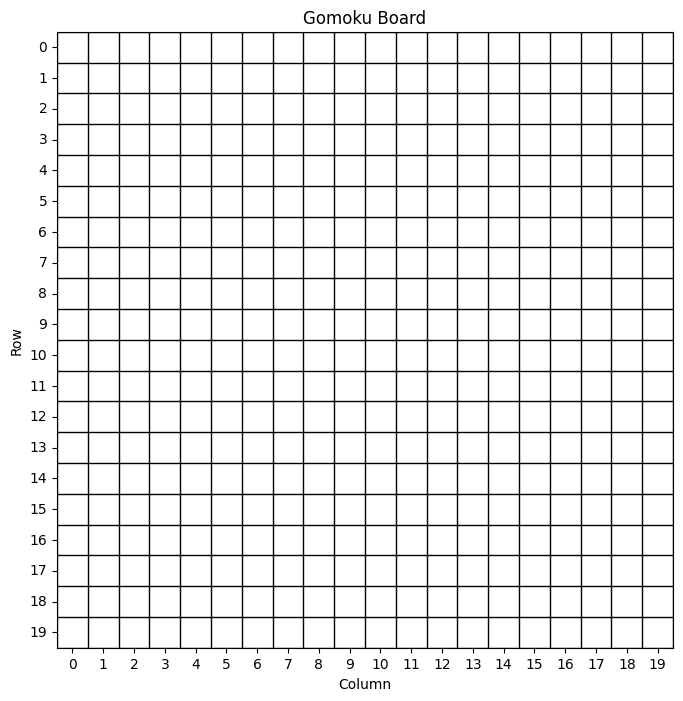

Chọn ô cờ: 
Chọn hàng ngang: 6
Chọn cột dọc: 8
Lượt thứ: 2


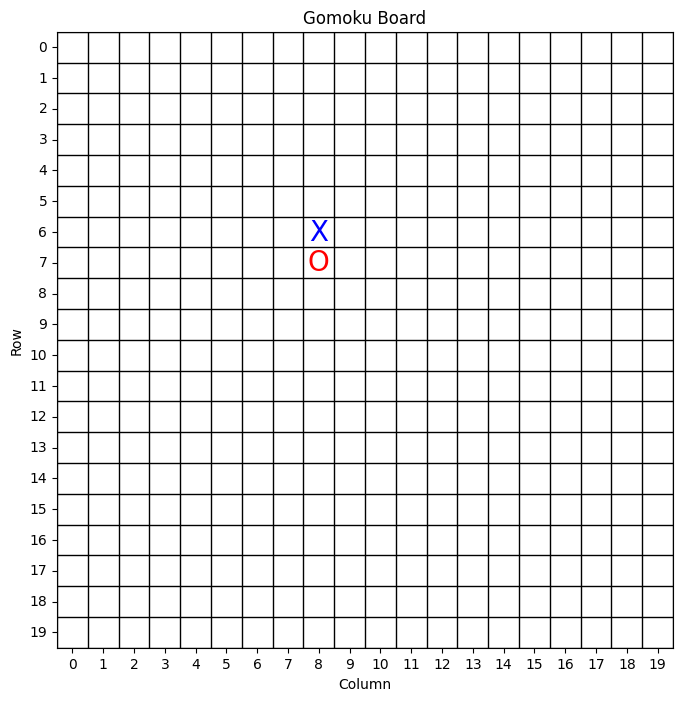

Lượt thứ: 3
Chọn ô cờ: 
Chọn hàng ngang: 7
Chọn cột dọc: 9


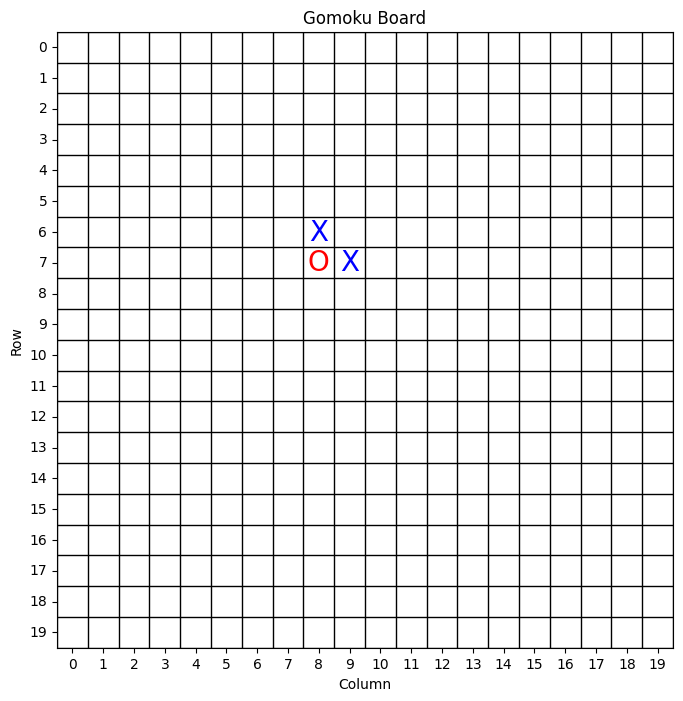

Lượt thứ: 4


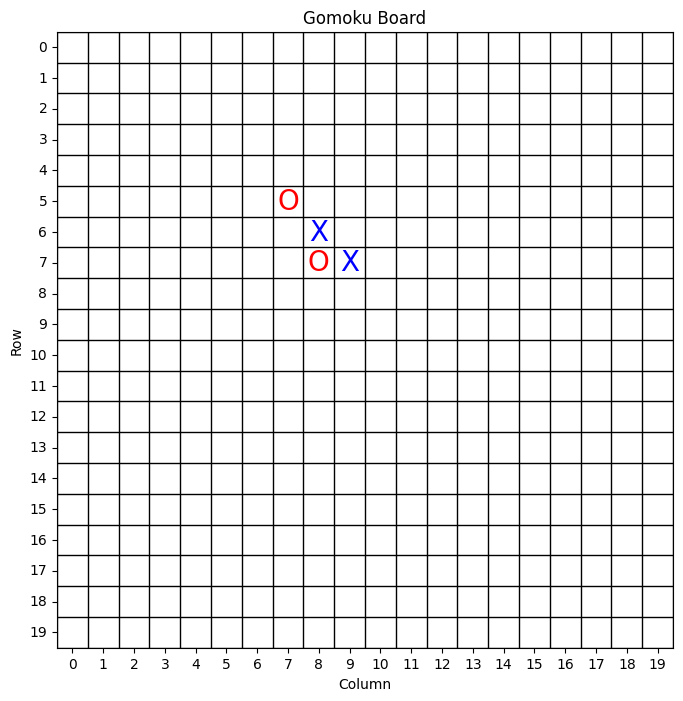

Lượt thứ: 5
Chọn ô cờ: 
Chọn hàng ngang: 7
Chọn cột dọc: 7


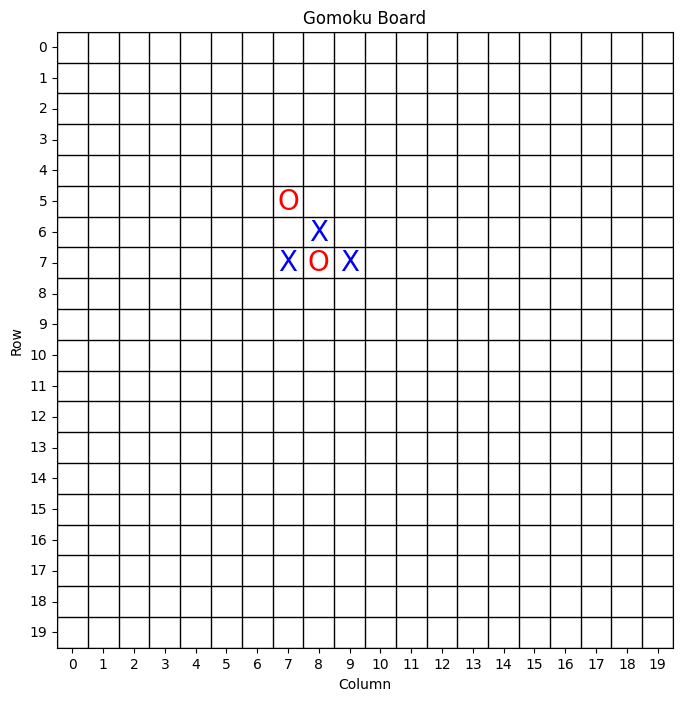

Lượt thứ: 6
394
AI move: (8, 10)


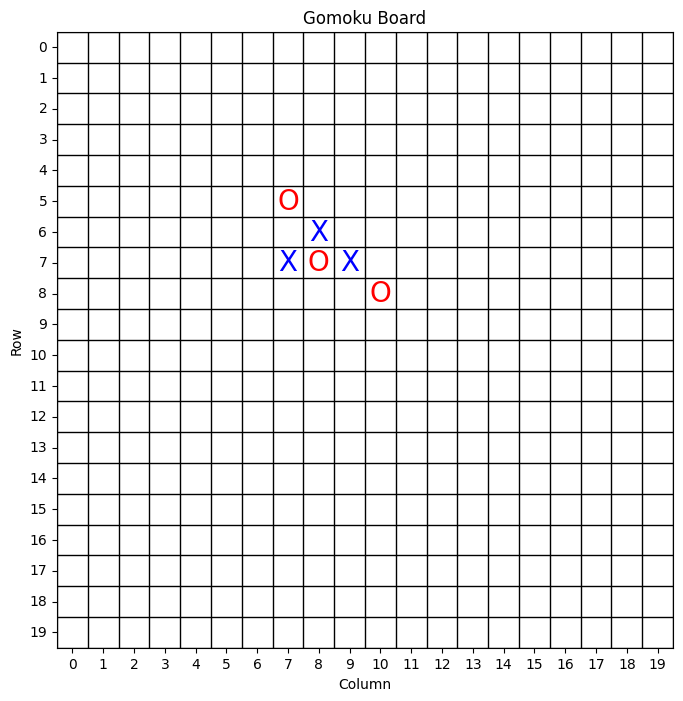

Lượt thứ: 7
Chọn ô cờ: 
Chọn hàng ngang: 6
Chọn cột dọc: 7


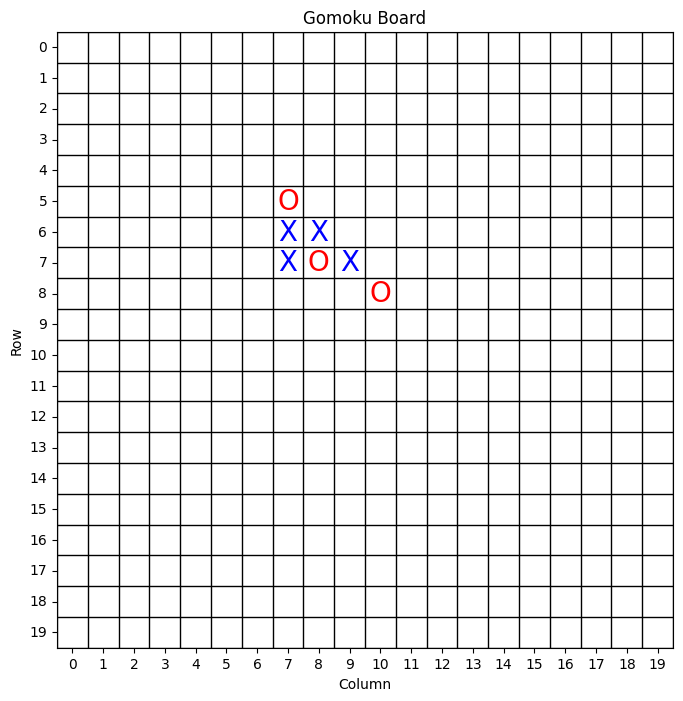

Lượt thứ: 8
418
AI move: (8, 7)


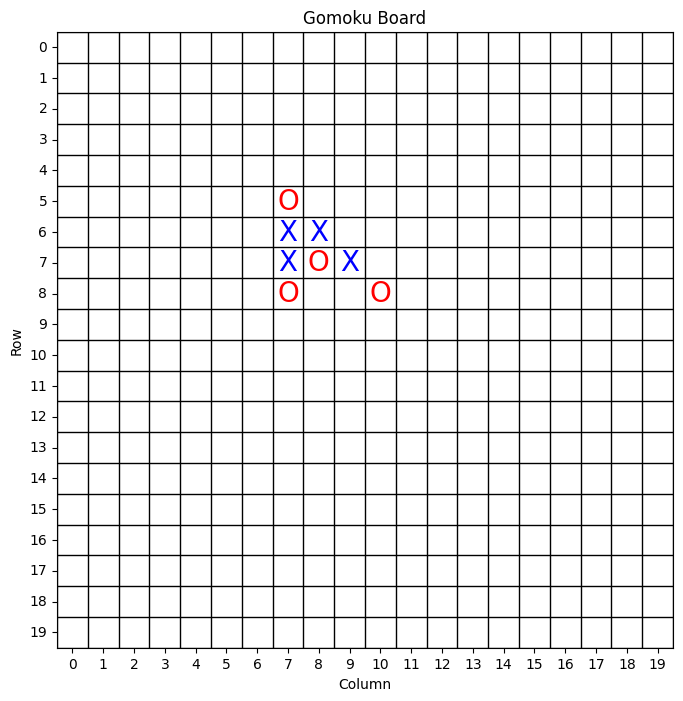

Lượt thứ: 9
Chọn ô cờ: 
Chọn hàng ngang: 6
Chọn cột dọc: 9


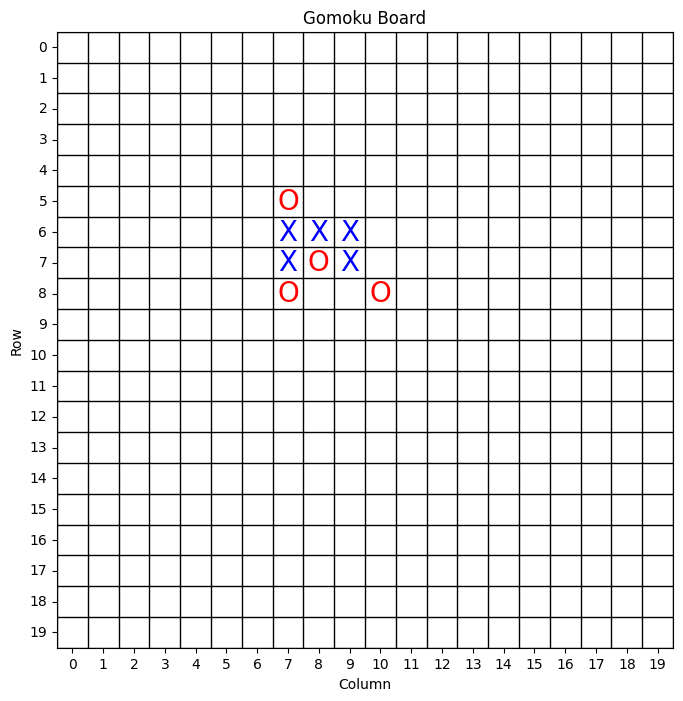

Lượt thứ: 10
393
AI move: (6, 10)


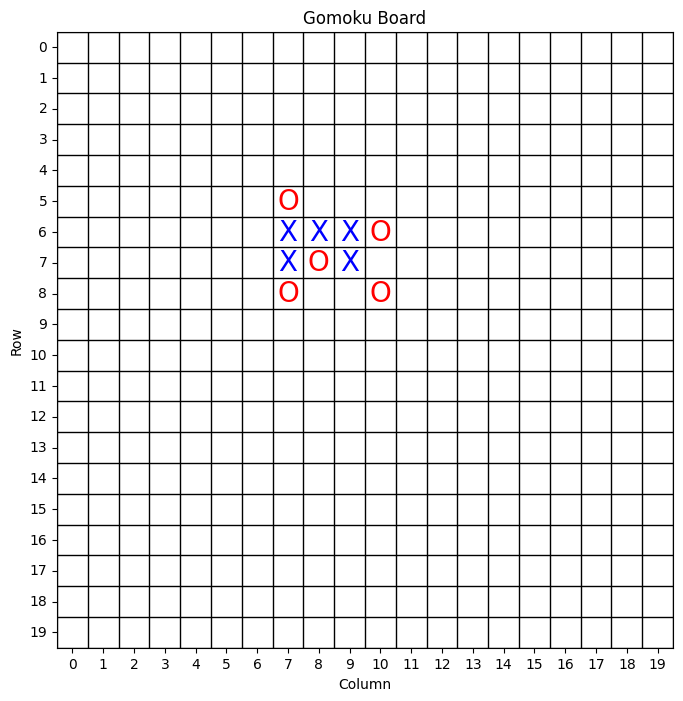

Lượt thứ: 11
Chọn ô cờ: 
Chọn hàng ngang: 5
Chọn cột dọc: 8


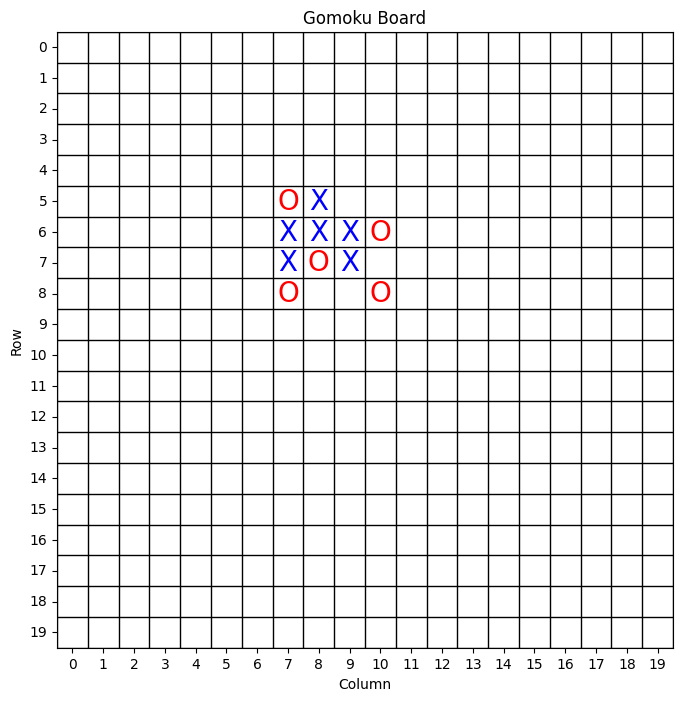

Lượt thứ: 12
505
AI move: (7, 10)


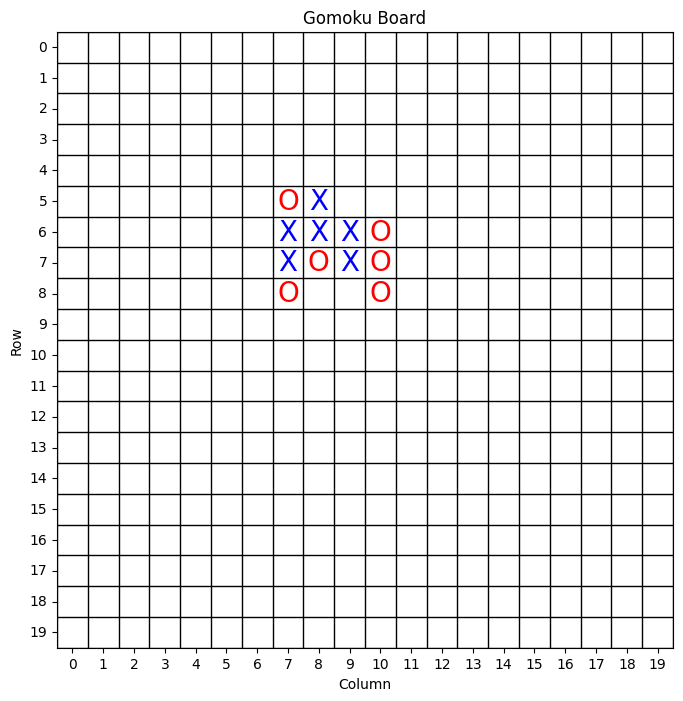

Lượt thứ: 13
Chọn ô cờ: 
Chọn hàng ngang: 5
Chọn cột dọc: 10


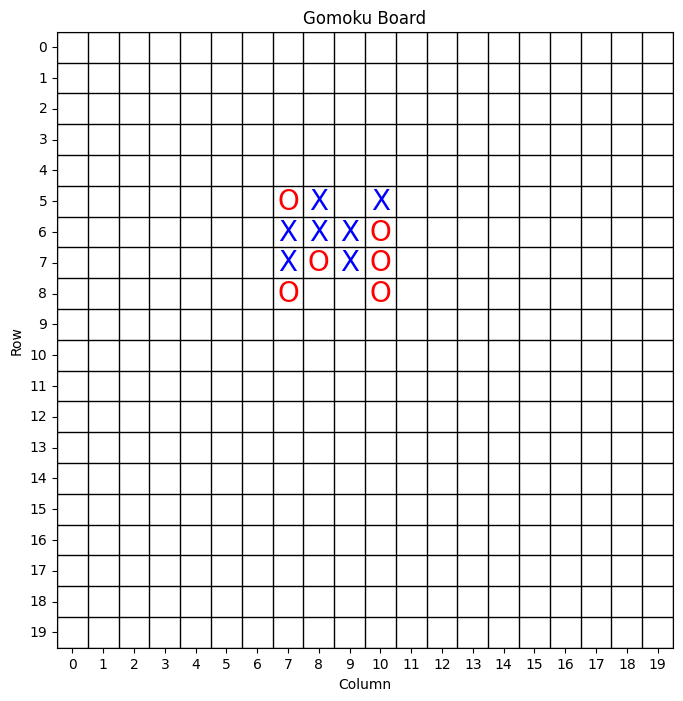

Lượt thứ: 14
360
AI move: (9, 10)


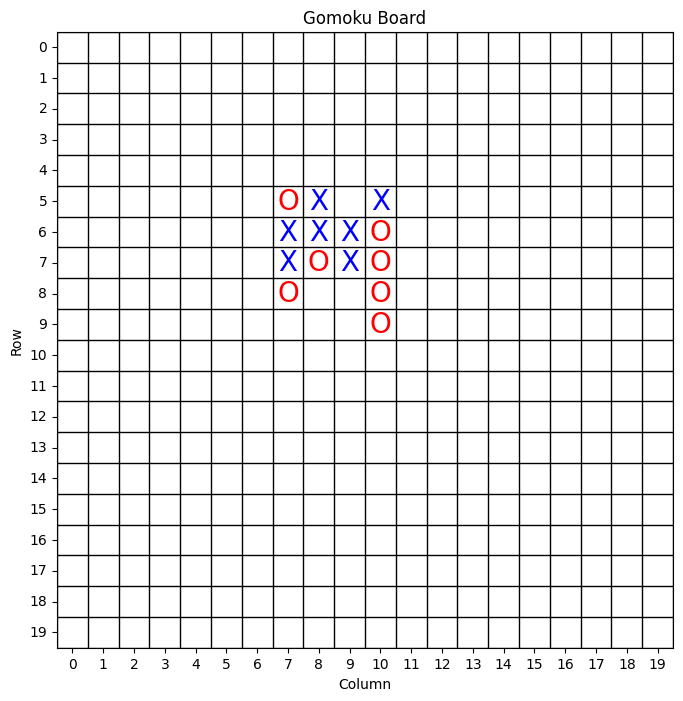

Lượt thứ: 15
Chọn ô cờ: 
Chọn hàng ngang: 10
Chọn cột dọc: 10


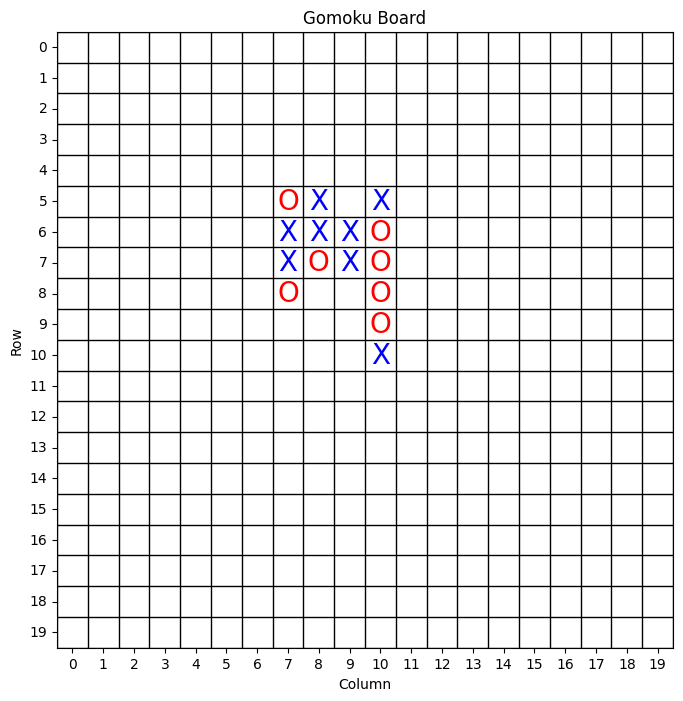

Lượt thứ: 16
381
AI move: (8, 9)


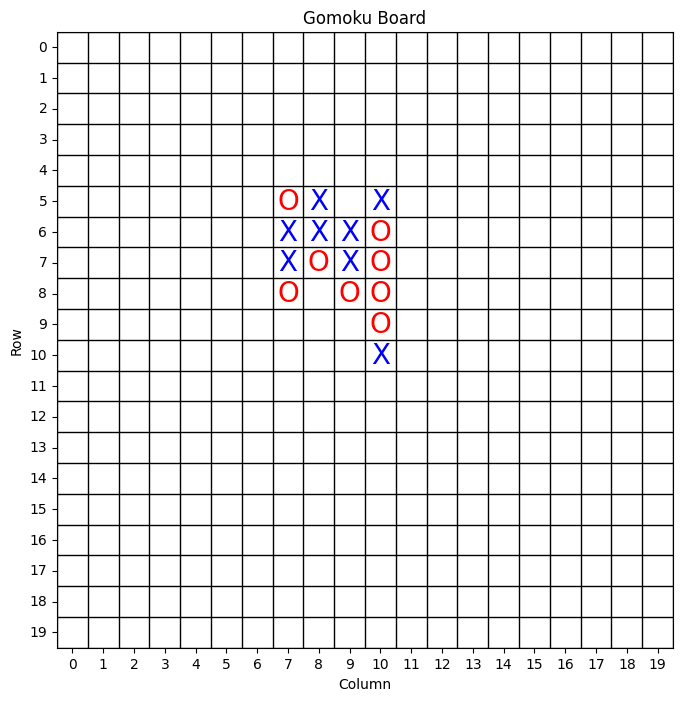

Lượt thứ: 17
Chọn ô cờ: 
Chọn hàng ngang: 8
Chọn cột dọc: 8


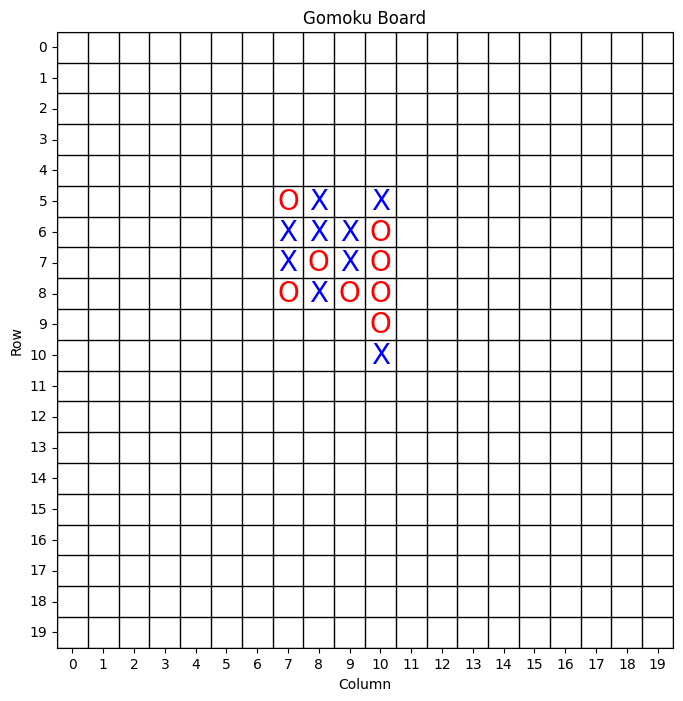

Lượt thứ: 18
393
AI move: (10, 11)


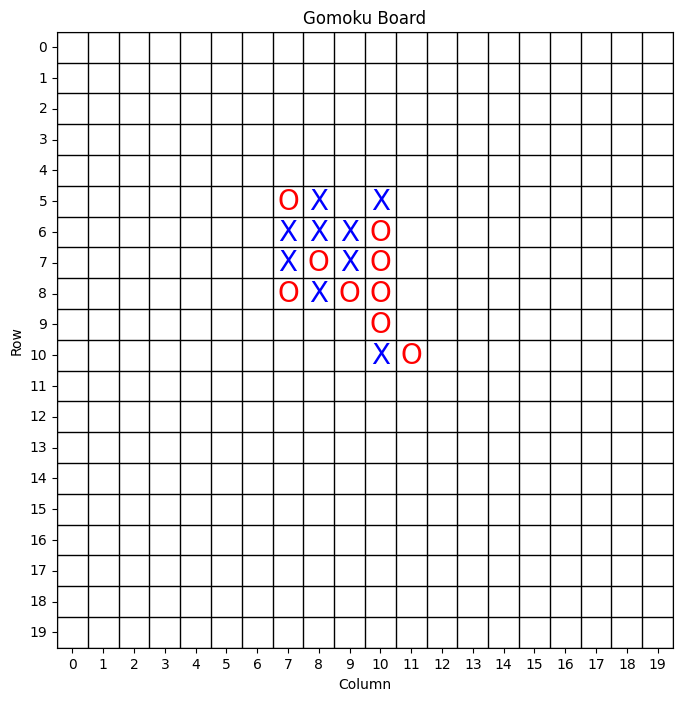

Lượt thứ: 19
Chọn ô cờ: 
Chọn hàng ngang: 11
Chọn cột dọc: 12


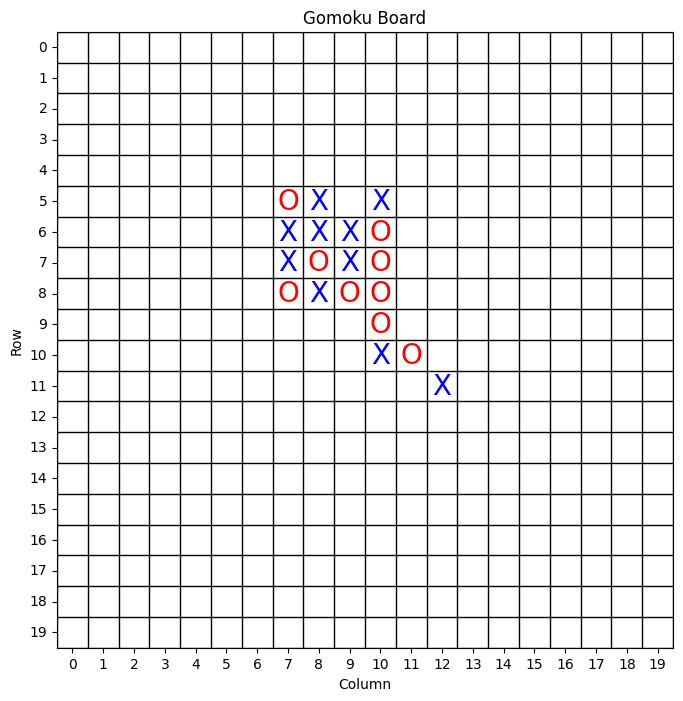

Lượt thứ: 20
366
AI move: (9, 9)


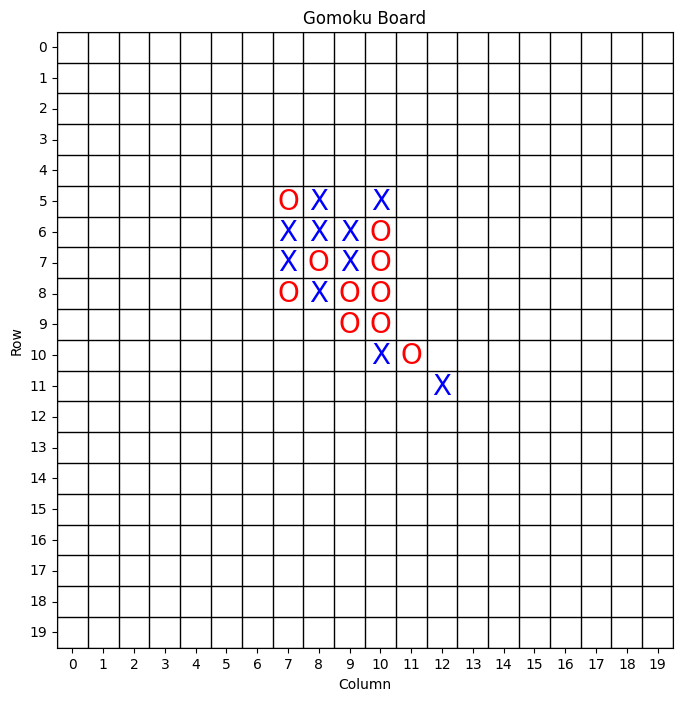

Lượt thứ: 21
Chọn ô cờ: 
Chọn hàng ngang: 10
Chọn cột dọc: 8


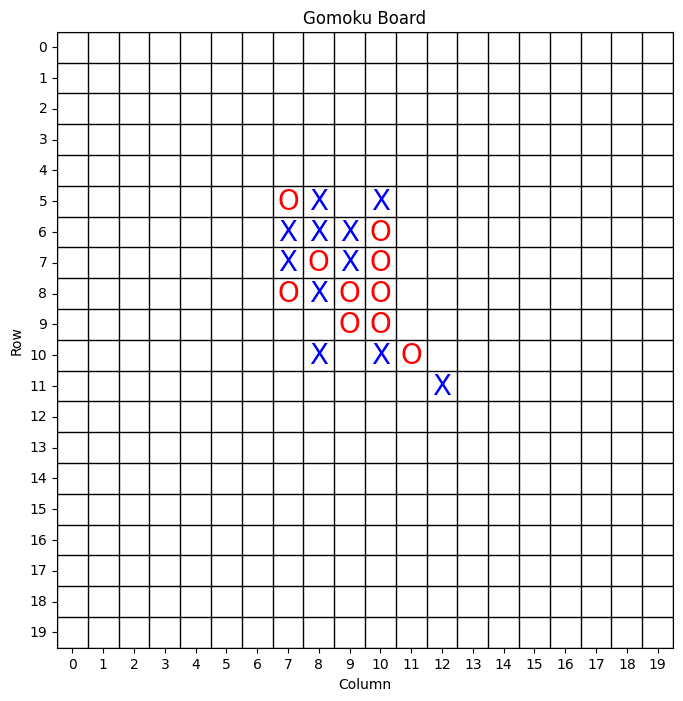

Lượt thứ: 22
573
AI move: (9, 8)


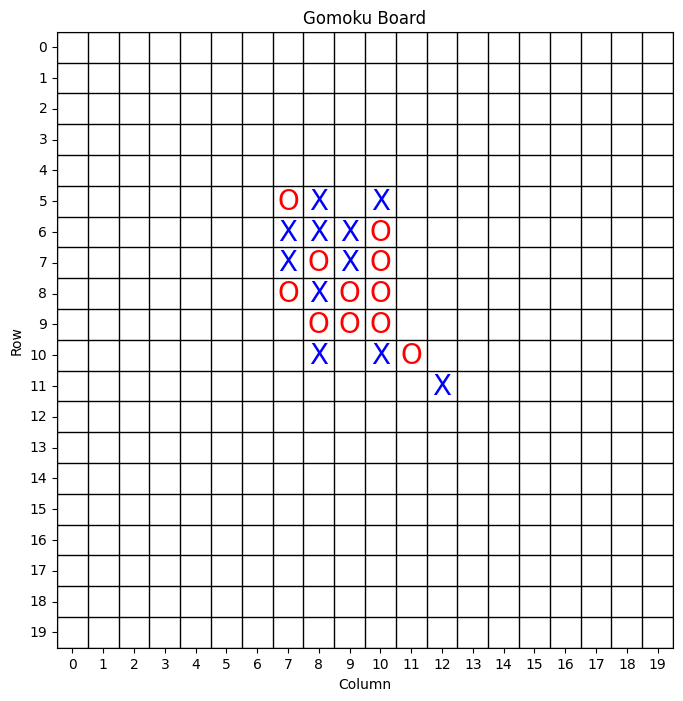

Lượt thứ: 23
Chọn ô cờ: 
Chọn hàng ngang: 9
Chọn cột dọc: 7


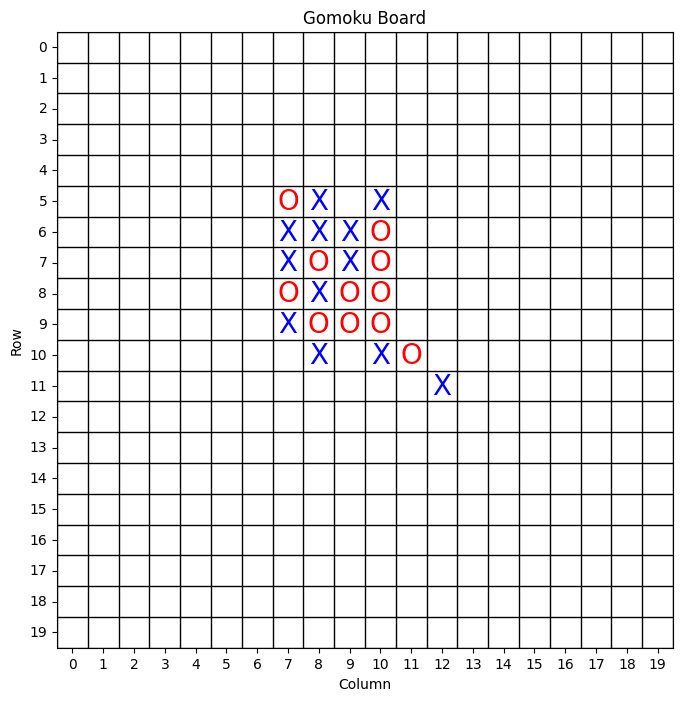

Lượt thứ: 24
348
AI move: (6, 11)


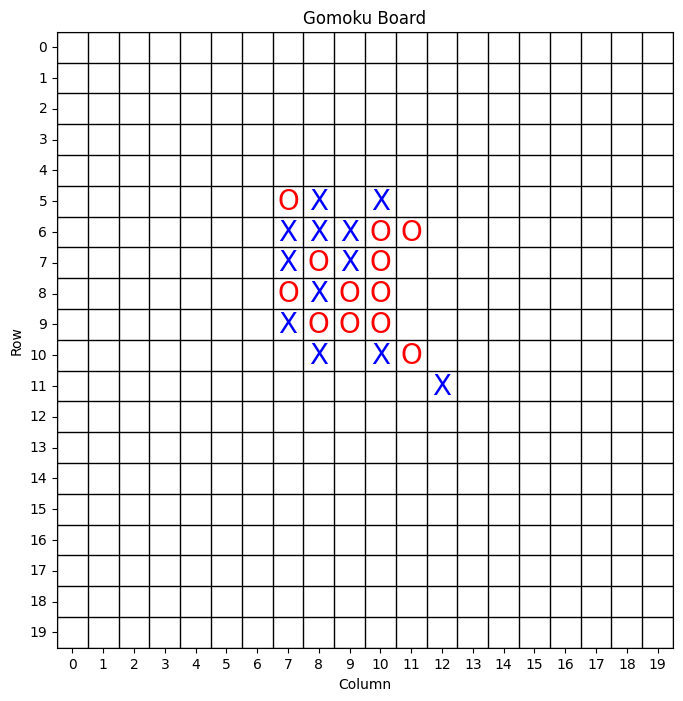

Lượt thứ: 25
Chọn ô cờ: 
Chọn hàng ngang: 10
Chọn cột dọc: 7


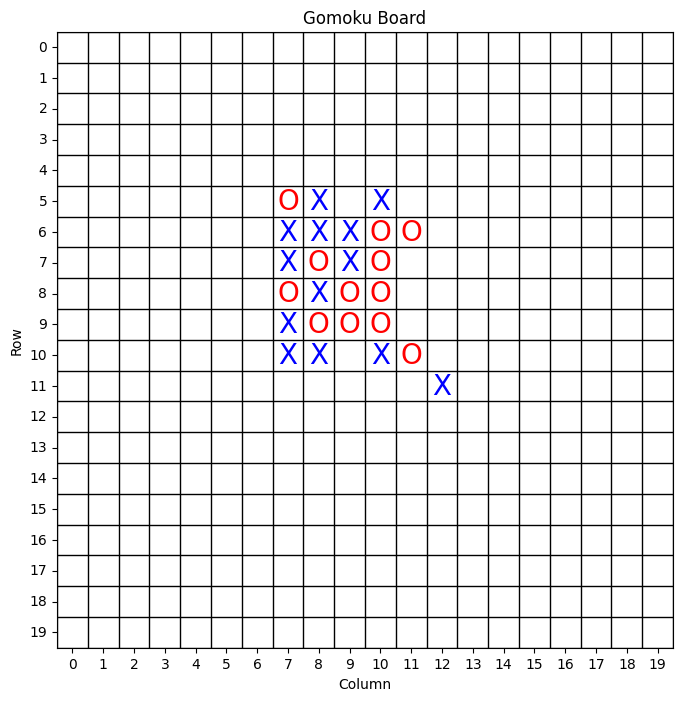

Lượt thứ: 26
239
AI move: (5, 12)


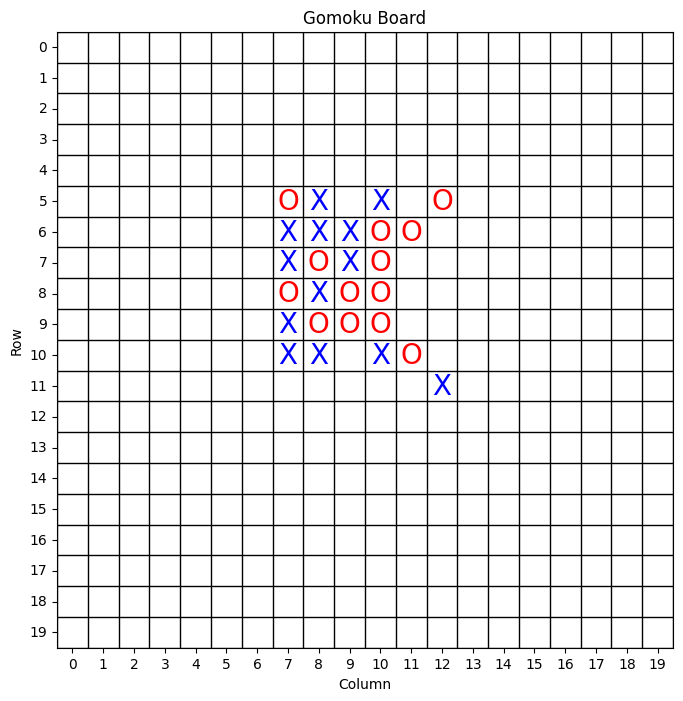

Máy thắng


In [11]:
m = Match()
m.start()